In [1]:
from city_tasks_assignment.classes import Problem
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from time import time
from scipy.stats import norm # To fit normal distribution
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
SAVE_FIG = False
DPI=500

In [3]:
problem = Problem(file_name='cities/Oldenburg', directed=False)

_ = problem.monte_carlo_simulation("MC_Sim/stochastic.txt", problem.tasks_dists.reshape(21*21) / 3, 
                               problem.tasks_times.reshape(5*21) / 3, 
                               [0] + [10]* (20*21 - 1), [50]*5*21, .5, .5, 40, 10000, 
                               its=100, print_conf=False)



In [4]:
fs = []
ts = []
cs = []

with open("MC_Sim/stochastic.txt", 'r') as f:
    for line in f.readlines():
        f, t, c = tuple(map(float, line[:-1].split(' ')))
        fs.append(f)
        ts.append(t)
        cs.append(c)
        
ts = np.array(ts)
cs = np.array(cs)
fs = np.array(fs)

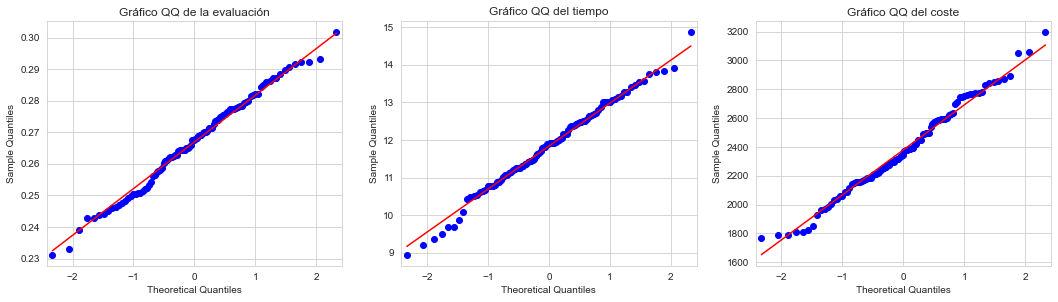

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4.5))
name = 'Gráfico QQ '

sm.qqplot(fs, ax=ax1, line='s')
ax1.set_title(name + 'de la evaluación')

sm.qqplot(ts, ax=ax2, line='s')
ax2.set_title(name + 'del tiempo')

sm.qqplot(cs, ax=ax3, line='s')
ax3.set_title(name + 'del coste')

if SAVE_FIG:
    plt.savefig('plots/QQ.png', dpi=DPI)
else:
    plt.show()

In [6]:
def plot_hist(ls , ax, name):

    m, M = min(ls), max(ls)

    ax.hist(ls, np.arange(m, M, (M - m) / (len(ls) / 15)))

    mu, std = norm.fit(ls)
    title = "Histograma %s\n y distribución normal asociada: $\mu$ = %.2f,  $\sigma$ = %.2f" % (("del " if name[0] != 'e' else "de la ") + name, mu, std)
    x = np.linspace(m, M, 100)
    p = norm.pdf(x, mu, std)

    ax2 = ax.twinx()

    ax2.plot(x, p, 'k', linewidth=2)

    ax.set_xlabel(name)
    ax.set_ylabel("")

    ax2.set_ylabel('')

    ax.set_title(title)
    ax.grid()

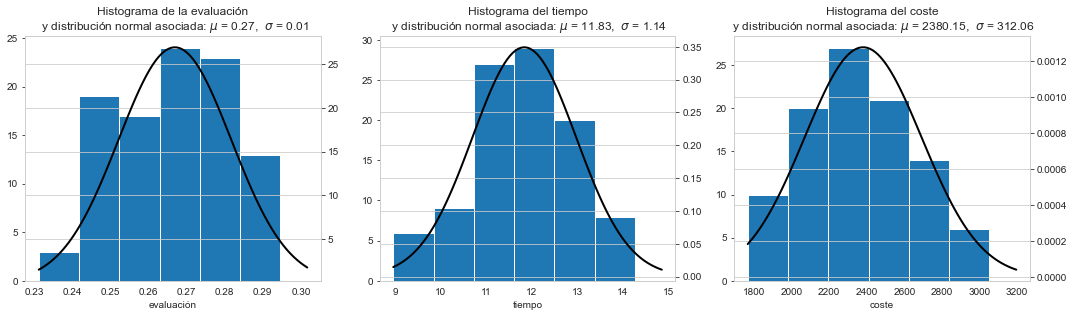

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4.5))

plot_hist(fs, ax1, "evaluación")
plot_hist(ts, ax2, "tiempo")
plot_hist(cs, ax3, "coste")

if SAVE_FIG:
    plt.savefig('plots/norm.png', dpi=DPI)
else:
    plt.show()